In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


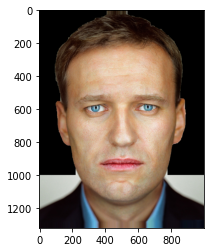

In [3]:
img = cv2.imread("../data/inputs/style.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x,y,c=np.shape(img)
mask = np.zeros((x,y))
rect = [0,0,x-1,y-1]
ic = 30
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
(mask, bgModel, fgModel) = cv2.grabCut(img, mask, rect, bgModel,fgModel, iterCount=ic, mode=cv2.GC_INIT_WITH_RECT)

outputMask1 = np.where((mask ==2),0, 1)
#outputMask1 = outputMask1*255
#plt.imshow(outputMask1,cmap='gray')
#plt.show()
outputMask1=outputMask1.astype("uint8")
kernel = np.ones((43,43),np.uint8)
outputMask2= cv2.morphologyEx(outputMask1, cv2.MORPH_CLOSE, kernel)
#plt.imshow(outputMask2,cmap='gray')
#plt.show()
outputMask2 = outputMask2*255*255
img = img*(outputMask2[:,:,np.newaxis])

plt.imshow(img)
plt.show()
